In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np 

from numpy.random import default_rng
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap 

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error                  # tells about how close a regression line is to a set of points
from sklearn.metrics import mean_absolute_error                 # It measures accuracy for continuous variables
from sklearn.datasets import make_regression

import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.simplefilter(action='ignore')

In [ ]:
# Read CSV train data file into DataFrame
house = pd.read_csv('/content/drive/MyDrive/MiniProject /2. Classification/DS3_C6_S2_Classification_HouseGrade_Data_Project.csv')
# preview the data
house


,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B
2996,2997,292,9,8,7,8,YES,116,87,7,97,4,3753,A
2997,2998,328,7,4,3,5,NO,0,78,5,95,6,3607,D
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B


In [ ]:
# shape of the dataset
print('The number of samples in data is {}.'.format(house.shape[0]))

The number of samples in data is 3000.


# Data Exploration

In [ ]:
house_copy = house

# Data Visualization

In [ ]:
import plotly.express as px
fig = px.box(house_copy, y="Area(total)")
fig.show()

As we can see from the above boxplot the range of the data is from to 290 to 360, and the median of the Area data is 325.

In [ ]:
import plotly.express as px
fig = px.box(house_copy, y="Grade")
fig.show()

As we can see from the above boxplot the range of the data is from to 0 to 4, and the median of the Grade data is 2.

In [ ]:
import plotly.express as px
fig = px.box(house_copy, y="Nbedrooms")
fig.show()

As we can see from the above boxplot the range of the data is from to 2 to 8, and the median of the Nbedrooms data is 5.

## 1. Data Exploration and Visualization - Understanding the data

In [ ]:
# explore the existing data types
house_copy.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

In [ ]:
# Count of each label in categorical column
house_copy.value_counts()

Id    Area(total)  Trooms  Nbedrooms  Nbwashrooms  Twashrooms  roof  Roof(Area)  Lawn(Area)  Nfloors  API  ANB  Expected price  Grade
1     339          6       5          4            6           NO    0           76          2        79   6    3481            D        1
2004  346          7       5          5            6           NO    0           77          4        89   1    4338            C        1
1995  326          6       4          3            5           YES   92          70          3        60   2    3645            D        1
1996  319          6       3          3            4           YES   90          99          4        49   2    3737            D        1
1997  301          6       3          2            3           NO    0           101         3        42   5    3704            E        1
                                                                                                                                        ..
1003  354          8       7    

In [ ]:
house_copy = house.replace(to_replace = " ?", value = np.nan)

# Data Preparation & Visualisation

#### Missing Values Treatment

In [ ]:
# Checking for null value in each column
print(house_copy.isnull().sum())

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64


#### Converting Non-Numerical Column to Categorical Column

In [ ]:
list = ["roof","Grade"]                         
for i in list :
  house_copy[i] = house_copy[i].astype("category")           ## to convert the non numerical column to categorical column
  print(house_copy)

        Id  Area(total)  Trooms  Nbedrooms  Nbwashrooms  Twashrooms roof  \
0        1          339       6          5            4           6   NO   
1        2          358       5          4            3           4  YES   
2        3          324       7          5            4           5  YES   
3        4          330       6          4            3           5  YES   
4        5          320       7          4            4           5   NO   
...    ...          ...     ...        ...          ...         ...  ...   
2995  2996          341       9          6            5           7  YES   
2996  2997          292       9          8            7           8  YES   
2997  2998          328       7          4            3           5   NO   
2998  2999          293       9          7            7           8   NO   
2999  3000          343       7          6            6           8   NO   

      Roof(Area)  Lawn(Area)  Nfloors  API  ANB  Expected price Grade  
0              

In [ ]:
print(house_copy.dtypes)

Id                   int64
Area(total)          int64
Trooms               int64
Nbedrooms            int64
Nbwashrooms          int64
Twashrooms           int64
roof              category
Roof(Area)           int64
Lawn(Area)           int64
Nfloors              int64
API                  int64
ANB                  int64
Expected price       int64
Grade             category
dtype: object


In [ ]:
# label_encoder object knows how to  understand word labels
label_encoder = preprocessing.LabelEncoder()
# Converting categorical feature to numerical type
house_copy['roof'] = label_encoder.fit_transform(house_copy['roof'])
house_copy['Grade'] = label_encoder.fit_transform(house_copy['Grade'])

In [ ]:
house_copy

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,0,0,76,2,79,6,3481,3
1,2,358,5,4,3,4,1,71,96,3,72,4,3510,3
2,3,324,7,5,4,5,1,101,117,5,64,3,3748,2
3,4,330,6,4,3,5,1,101,82,2,59,2,3134,3
4,5,320,7,4,4,5,0,0,75,3,40,1,3843,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,1,95,115,5,90,2,4246,1
2996,2997,292,9,8,7,8,1,116,87,7,97,4,3753,0
2997,2998,328,7,4,3,5,0,0,78,5,95,6,3607,3
2998,2999,293,9,7,7,8,0,0,78,7,51,3,4198,1


In [ ]:
print(house_copy.dtypes)

Id                int64
Area(total)       int64
Trooms            int64
Nbedrooms         int64
Nbwashrooms       int64
Twashrooms        int64
roof              int64
Roof(Area)        int64
Lawn(Area)        int64
Nfloors           int64
API               int64
ANB               int64
Expected price    int64
Grade             int64
dtype: object


### Data Scaling.

In [ ]:
# Defining method to perform data scaling operation based on the type of scaling
def feature_scale(scale):
  numerics = ["int16","int32","int64","float16","float32","float64"]
  new_house = house_copy.select_dtypes(include=numerics)
  if scale == "minmax":
    scaler =  MinMaxScaler()
  else:
    scaler = StandardScaler()
  house_scaled = pd.DataFrame(scaler.fit_transform(new_house.to_numpy()),columns = new_house.columns)
  return house_scaled

In [ ]:
# scaling the data using MinMax sacling process
scale = 'minmax'
house_scaled = feature_scale(scale)
house_scaled.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,0.000000,0.700000,0.25,0.500000,0.428571,0.500,0.0,0.000000,0.12,0.166667,0.650000,1.0,0.360251,0.75
1,0.000333,0.971429,0.00,0.333333,0.285714,0.250,1.0,0.591667,0.52,0.333333,0.533333,0.6,0.370944,0.75
2,0.000667,0.485714,0.50,0.500000,0.428571,0.375,1.0,0.841667,0.94,0.666667,0.400000,0.4,0.458702,0.50
3,0.001000,0.571429,0.25,0.333333,0.285714,0.375,1.0,0.841667,0.24,0.166667,0.316667,0.2,0.232301,0.75
4,0.001334,0.428571,0.50,0.333333,0.428571,0.375,0.0,0.000000,0.10,0.333333,0.000000,0.0,0.493732,0.75


In [ ]:
corr = house_scaled.corr()
corr.style.background_gradient(cmap='cividis')

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
Id,1.000000,0.003186,0.003165,0.004814,0.003496,0.001092,0.011059,0.013046,0.006309,-0.010939,-0.003739,-0.013219,0.009216,-0.006074
Area(total),0.003186,1.000000,0.019041,0.031328,0.031819,0.038509,0.014229,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507,-0.177332
Trooms,0.003165,0.019041,1.000000,0.865878,0.827072,0.794870,0.025142,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170,-0.875145
Nbedrooms,0.004814,0.031328,0.865878,1.000000,0.956578,0.919158,0.023058,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687,-0.865389
Nbwashrooms,0.003496,0.031819,0.827072,0.956578,1.000000,0.960007,0.028549,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659,-0.847319
Twashrooms,0.001092,0.038509,0.794870,0.919158,0.960007,1.000000,0.028212,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627,-0.819280
roof,0.011059,0.014229,0.025142,0.023058,0.028549,0.028212,1.000000,0.976561,-0.004640,0.014985,-0.007983,-0.020511,0.007880,-0.166635
Roof(Area),0.013046,0.017029,0.026550,0.025073,0.028832,0.028763,0.976561,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346,-0.170259
Lawn(Area),0.006309,-0.002118,0.009557,0.000054,0.006617,0.008386,-0.004640,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561,-0.051200
Nfloors,-0.010939,0.016819,0.862367,0.742132,0.711936,0.684966,0.014985,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598,-0.787623


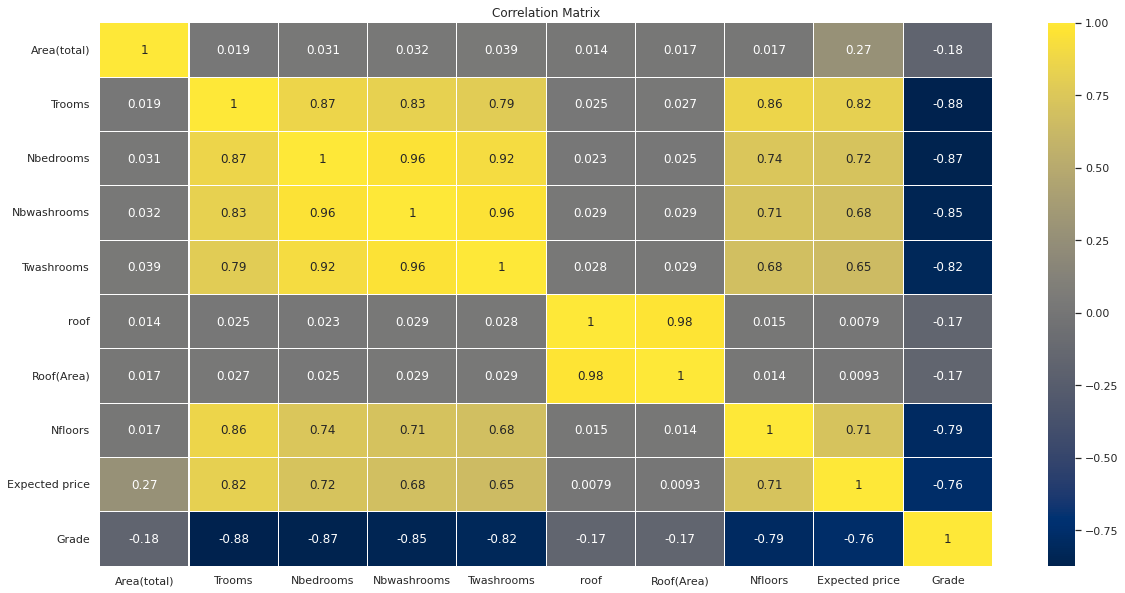

In [ ]:
#SELECTING BEST FEATURE BASED ON THERE CORRELATION VALUE GREATER THAN 0.1
sel_corr = []
for i in house:
  if abs(house_scaled[i].corr(house_scaled['Grade']))>=0.1:
    sel_corr.append(i) 

#PLOTTING HEATMAP AMONG SELECTED FEATURES

fig, ax = plt.subplots(figsize = (20,10))
ax = (sns.heatmap(house_scaled[sel_corr]
                  .corr(), annot =True, cmap ='cividis',linewidths=0.1, linecolor='white').set(title = 'Correlation Matrix'))
plt.show()

In [ ]:
house_scaled.drop(house_scaled.columns[[13]], axis=1, inplace=True)
income = house_copy.iloc[:,[13]]
house_scaled1 = pd.concat([income, house_scaled], axis=1)
house_scaled1

,Grade,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
0,3,0.000000,0.700000,0.25,0.500000,0.428571,0.500,0.0,0.000000,0.12,0.166667,0.650000,1.0,0.360251
1,3,0.000333,0.971429,0.00,0.333333,0.285714,0.250,1.0,0.591667,0.52,0.333333,0.533333,0.6,0.370944
2,2,0.000667,0.485714,0.50,0.500000,0.428571,0.375,1.0,0.841667,0.94,0.666667,0.400000,0.4,0.458702
3,3,0.001000,0.571429,0.25,0.333333,0.285714,0.375,1.0,0.841667,0.24,0.166667,0.316667,0.2,0.232301
4,3,0.001334,0.428571,0.50,0.333333,0.428571,0.375,0.0,0.000000,0.10,0.333333,0.000000,0.0,0.493732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,0.998666,0.728571,1.00,0.666667,0.571429,0.625,1.0,0.791667,0.90,0.666667,0.833333,0.2,0.642330
2996,0,0.999000,0.028571,1.00,1.000000,0.857143,0.750,1.0,0.966667,0.34,1.000000,0.950000,0.6,0.460546
2997,3,0.999333,0.542857,0.50,0.333333,0.285714,0.375,0.0,0.000000,0.16,0.666667,0.916667,1.0,0.406711
2998,1,0.999667,0.042857,1.00,0.833333,0.857143,0.750,0.0,0.000000,0.16,1.000000,0.183333,0.4,0.624631


## Train-Test Split

In [ ]:
x = house_scaled1.iloc[:, 1:]
y = house_scaled1.iloc[:, 0]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 500)
print(x_train.shape)
print(x_test.shape)

(2100, 13)
(900, 13)


In [ ]:
results_f1 = []
names = []
results_recall = []
results_precision = []
results_accuracy = []

# KNN

In [ ]:
from sklearn import neighbors
k=3
# learning the classifier
knn = neighbors.KNeighborsClassifier(k)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Model Properties
print(knn.classes_)
print(knn.n_neighbors)


[0 1 2 3 4]
3


Minimum error:- 0.17555555555555555 at K = 4


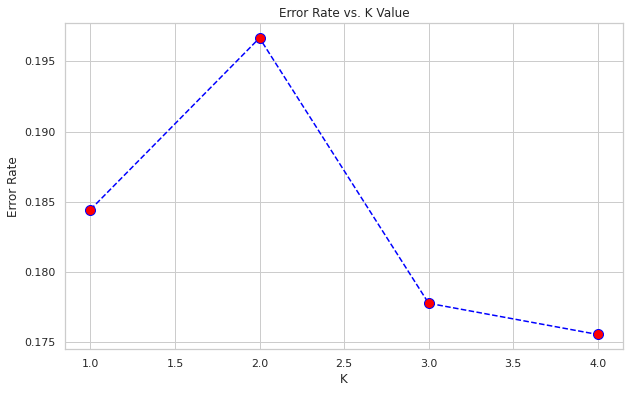

In [ ]:
error_rate = []
for i in range(1,5):
  knn_store = neighbors.KNeighborsClassifier(n_neighbors=i)
  knn_store.fit(x_train,y_train)
  pred_i = knn_store.predict(x_test)
  error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,5),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [ ]:
knn.score(x_train, y_train)

0.9223809523809524

In [ ]:
knn.score(x_test, y_test)

0.8222222222222222

In [ ]:
# define the model
model1 = neighbors.KNeighborsClassifier(k)

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)
n_scores_f1 = cross_val_score(model1, x_train, y_train, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores_recall = cross_val_score(model1, x_train, y_train, scoring='recall_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores_precision = cross_val_score(model1, x_train, y_train, scoring='precision_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores_accuracy = cross_val_score(model1, x_train, y_train, cv=cv, n_jobs=-1, error_score='raise')


results_f1.append(n_scores_f1)
results_recall.append(n_scores_recall)
results_precision.append(n_scores_precision)
results_accuracy.append(n_scores_accuracy)
names.append('KNN')

print('F1-SCORE: %.3f (%.3f)' % (mean(n_scores_f1), std(n_scores_f1)))
print('RECALL-SCORE: %.3f (%.3f)' % (mean(n_scores_recall), std(n_scores_recall)))
print('PRECISION-SCORE: %.3f (%.3f)' % (mean(n_scores_precision), std(n_scores_precision)))
print('ACCURACY-SCORE: %.3f (%.3f)' % (mean(n_scores_accuracy), std(n_scores_accuracy)))

F1-SCORE: 0.830 (0.021)
RECALL-SCORE: 0.832 (0.021)
PRECISION-SCORE: 0.832 (0.021)
ACCURACY-SCORE: 0.832 (0.021)


# Baseline Decision Tree Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold

In [ ]:
model = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)
n_scores_f1 = cross_val_score(model, x, y, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores_recall = cross_val_score(model, x, y, scoring='recall_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores_precision = cross_val_score(model, x, y, scoring='precision_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores_accuracy = cross_val_score(model, x, y, cv=cv, n_jobs=-1, error_score='raise')


results_f1.append(n_scores_f1)
results_recall.append(n_scores_recall)
results_precision.append(n_scores_precision)
results_accuracy.append(n_scores_accuracy)
names.append('DTC')

print('F1-SCORE: %.3f (%.3f)' % (mean(n_scores_f1), std(n_scores_f1)))
print('RECALL-SCORE: %.3f (%.3f)' % (mean(n_scores_recall), std(n_scores_recall)))
print('PRECISION-SCORE: %.3f (%.3f)' % (mean(n_scores_precision), std(n_scores_precision)))
print('ACCURACY-SCORE: %.3f (%.3f)' % (mean(n_scores_accuracy), std(n_scores_accuracy)))

F1-SCORE: 0.842 (0.021)
RECALL-SCORE: 0.844 (0.020)
PRECISION-SCORE: 0.843 (0.016)
ACCURACY-SCORE: 0.841 (0.022)


# Bagging Random Classifier

In [ ]:
model = RandomForestClassifier()


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)
n_scores_f1 = cross_val_score(model, x, y, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores_recall = cross_val_score(model, x, y, scoring='recall_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores_precision = cross_val_score(model, x, y, scoring='precision_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores_accuracy = cross_val_score(model, x, y, cv=cv, n_jobs=-1, error_score='raise')


results_f1.append(n_scores_f1)
results_recall.append(n_scores_recall)
results_precision.append(n_scores_precision)
results_accuracy.append(n_scores_accuracy)
names.append('RFC')


# report performance
print('F1-SCORE: %.3f (%.3f)' % (mean(n_scores_f1), std(n_scores_f1)))
print('RECALL-SCORE: %.3f (%.3f)' % (mean(n_scores_recall), std(n_scores_recall)))
print('PRECISION-SCORE: %.3f (%.3f)' % (mean(n_scores_precision), std(n_scores_recall)))
print('ACCURACY-SCORE: %.3f (%.3f)' % (mean(n_scores_accuracy), std(n_scores_accuracy)))

F1-SCORE: 0.896 (0.016)
RECALL-SCORE: 0.903 (0.012)
PRECISION-SCORE: 0.902 (0.012)
ACCURACY-SCORE: 0.902 (0.012)


# AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model = AdaBoostClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)
n_scores_f1 = cross_val_score(model, x, y, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores_recall = cross_val_score(model, x, y, scoring='recall_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores_precision = cross_val_score(model, x, y, scoring='precision_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores_accuracy = cross_val_score(model, x, y, cv=cv, n_jobs=-1, error_score='raise')

results_f1.append(n_scores_f1)
results_recall.append(n_scores_recall)
results_precision.append(n_scores_precision)
results_accuracy.append(n_scores_accuracy)
names.append('ADA')

# report performance
print('F1-SCORE: %.3f (%.3f)' % (mean(n_scores_f1), std(n_scores_f1)))
print('RECALL-SCORE: %.3f (%.3f)' % (mean(n_scores_recall), std(n_scores_recall)))
print('PRECISION-SCORE: %.3f (%.3f)' % (mean(n_scores_precision), std(n_scores_recall)))
print('ACCURACY-SCORE: %.3f (%.3f)' % (mean(n_scores_accuracy), std(n_scores_accuracy)))

F1-SCORE: 0.583 (0.062)
RECALL-SCORE: 0.609 (0.055)
PRECISION-SCORE: 0.616 (0.055)
ACCURACY-SCORE: 0.609 (0.055)


#### As we compared several models with each others, we can say that Bagging Random Classifier is the most suitable model as compared to others.

# Stacking

In [ ]:
"""# required Python libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier"""

'# required Python libraries\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.svm import SVC\nfrom sklearn.naive_bayes import GaussianNB\nfrom sklearn.ensemble import StackingClassifier'

In [ ]:
"""def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('svc', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = DecisionTreeClassifier()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model"""

"def get_stacking():\n\t# define the base models\n\tlevel0 = list()\n\tlevel0.append(('knn', KNeighborsClassifier()))\n\tlevel0.append(('svc', SVC()))\n\tlevel0.append(('bayes', GaussianNB()))\n\t# define meta learner model\n\tlevel1 = DecisionTreeClassifier()\n\t# define the stacking ensemble\n\tmodel = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)\n\treturn model"

In [ ]:
"""model = get_stacking()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores_f1 = cross_val_score(model, x_train, y, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores_recall = cross_val_score(model, x_train, y, scoring='recall_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores_precision = cross_val_score(model, x_train, y, scoring='precision_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores_accuracy = cross_val_score(model, x_train, y, cv=cv, n_jobs=-1, error_score='raise')

results_f1.append(n_scores_f1)
results_recall.append(n_scores_recall)
results_precision.append(n_scores_precision)
results_accuracy.append(n_scores_accuracy)
names.append('STACKING')

# report performance
print('F1-SCORE: %.3f (%.3f)' % (mean(n_scores_f1), std(n_scores_f1)))
print('RECALL-SCORE: %.3f (%.3f)' % (mean(n_scores_recall), std(n_scores_recall)))
print('PRECISION-SCORE: %.3f (%.3f)' % (mean(n_scores_precision), std(n_scores_recall)))
print('ACCURACY-SCORE: %.3f (%.3f)' % (mean(n_scores_accuracy), std(n_scores_accuracy)))
print('Values of N_scores for F1-score in STACKING:\n')
n_scores_f1"""

"model = get_stacking()\n\ncv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)\nn_scores_f1 = cross_val_score(model, x_train, y, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')\nn_scores_recall = cross_val_score(model, x_train, y, scoring='recall_weighted', cv=cv, n_jobs=-1, error_score='raise')\nn_scores_precision = cross_val_score(model, x_train, y, scoring='precision_weighted', cv=cv, n_jobs=-1, error_score='raise')\nn_scores_accuracy = cross_val_score(model, x_train, y, cv=cv, n_jobs=-1, error_score='raise')\n\nresults_f1.append(n_scores_f1)\nresults_recall.append(n_scores_recall)\nresults_precision.append(n_scores_precision)\nresults_accuracy.append(n_scores_accuracy)\nnames.append('STACKING')\n\n# report performance\nprint('F1-SCORE: %.3f (%.3f)' % (mean(n_scores_f1), std(n_scores_f1)))\nprint('RECALL-SCORE: %.3f (%.3f)' % (mean(n_scores_recall), std(n_scores_recall)))\nprint('PRECISION-SCORE: %.3f (%.3f)' % (mean(n_scores_precision), std(n_scores